In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"Dataset Location")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.shape

(3168, 21)

In [6]:
df.info

<bound method DataFrame.info of       meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt  

In [7]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [8]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1) , df['label'], test_size = 0.2)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

scaled_features = sc.transform(df.drop('label', axis=1))

data_std = pd.DataFrame(scaled_features, columns = df.columns[:-1])
data_std.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.126285,0.425970,-4.218200,-2.598872,-5.996531,-0.245303,1.851809,1.387541,0.002566,0.511358,-2.150582,-4.126285,-1.709362,-1.058445,0.551371,-1.524676,-0.700933,-1.403437,-1.391748,-1.369081
1,-3.914995,0.609139,-3.992783,-2.508909,-5.887369,-0.289441,3.735015,3.589163,-0.023632,0.636476,-2.150582,-3.914995,-1.000796,-1.052409,-0.276527,-1.522462,-0.700933,-1.390739,-1.379050,-0.944740
2,-3.531391,1.595151,-4.089259,-2.730853,-4.154991,0.889878,5.376718,5.974775,-1.043896,0.436693,-2.150582,-3.531391,-1.277253,-1.060685,0.401694,-1.524349,-0.700933,-1.401320,-1.389631,-0.994082
3,-1.023757,0.895676,-0.755682,-0.910175,-0.797794,0.610517,-0.439329,-0.264088,1.560734,1.861542,-1.064453,-1.023757,-1.569019,-0.956612,-0.276527,-1.167885,-0.700933,-1.253183,-1.241491,0.623308
4,-1.570243,1.315612,-1.672401,-1.280223,-0.882128,0.987089,-0.465264,-0.263132,1.753021,2.184788,-0.800513,-1.570243,-1.046882,-0.998705,0.257007,-0.225980,-0.700933,0.080051,0.091773,0.310120


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [14]:
accuracy_rate = []

for i in range(1,15):  
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, data_std, df['label'], cv = 4)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'ACCURACY')

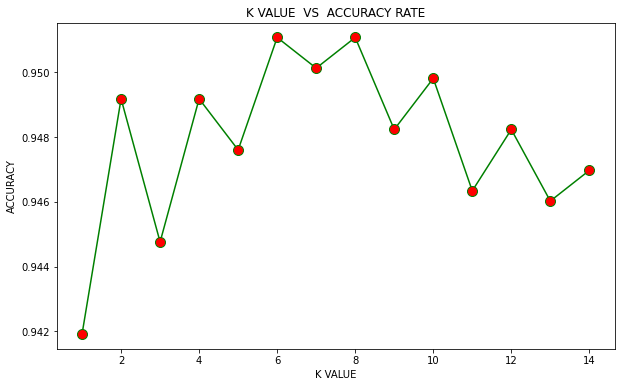

In [15]:
plt.figure(figsize=(10,6))

plt.plot(range(1,15), accuracy_rate, color='green', marker='o',markerfacecolor='red', markersize=10)
plt.title('K VALUE  VS  ACCURACY RATE')
plt.xlabel('K VALUE')
plt.ylabel('ACCURACY')

In [16]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print("Accuracy Rate: ", accuracy_score(y_test,y_pred))

Accuracy Rate:  0.9826498422712934


In [19]:
from sklearn.metrics import classification_report,confusion_matrix


In [20]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[298   7]
 [  4 325]]


Classification Report: 
               precision    recall  f1-score   support

      female       0.99      0.98      0.98       305
        male       0.98      0.99      0.98       329

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Random forest


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
classifier = RandomForestClassifier(n_estimators = 500,criterion = 'entropy',random_state = 101)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
print("Accuracy Rate: ", accuracy_score(y_test,y_pred))

Accuracy Rate:  0.9873817034700315


In [24]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[301   4]
 [  4 325]]


Classification Report: 
               precision    recall  f1-score   support

      female       0.99      0.99      0.99       305
        male       0.99      0.99      0.99       329

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:

logmodel = LogisticRegression(C=0.01, solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

In [27]:
print("Accuracy Rate: ", accuracy_score(y_test,y_pred))

Accuracy Rate:  0.973186119873817


In [28]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[291  14]
 [  3 326]]


Classification Report: 
               precision    recall  f1-score   support

      female       0.99      0.95      0.97       305
        male       0.96      0.99      0.97       329

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



SVM

In [29]:
from sklearn.svm import SVC

In [30]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [31]:
print("Accuracy Rate: ", accuracy_score(y_test,y_pred))

Accuracy Rate:  0.9858044164037855


In [32]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[300   5]
 [  4 325]]


Classification Report: 
               precision    recall  f1-score   support

      female       0.99      0.98      0.99       305
        male       0.98      0.99      0.99       329

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

In [35]:
print("Accuracy Rate: ", accuracy_score(y_test, y_pred))

Accuracy Rate:  0.973186119873817


In [36]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[296   9]
 [  8 321]]


Classification Report: 
               precision    recall  f1-score   support

      female       0.97      0.97      0.97       305
        male       0.97      0.98      0.97       329

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

